In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\asus\Desktop\pro1\4th project sentiment analysis\food reviews dataset\Reviews.csv')

In [3]:
df.shape

(568454, 10)

In [4]:
df = df.head(200)

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df['Score'].value_counts().sort_index().plot(kind='bar',title ='Reviews',figsize=(10,5))

In [ ]:
example = df['Text'][50] 
print(example)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [ ]:
tokens = word_tokenize(example)
tokens[:10]

In [ ]:
tagged = pos_tag(tokens)

In [ ]:
tagged[:10]

In [ ]:
chunked = nltk.chunk.ne_chunk(tagged)

In [ ]:
print(chunked)

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

import tqdm

In [ ]:
sio = SentimentIntensityAnalyzer()

In [ ]:
sio.polarity_scores(text='This is insane')

In [ ]:
sio.polarity_scores(example)

In [ ]:
results = {}
for index,rows in tqdm.tqdm(df.iterrows(),total = len(df)):
    results[rows['Id']] = sio.polarity_scores(rows['Text'])

In [ ]:
vaders = pd.DataFrame(results).T

In [ ]:
vaders.head()

In [ ]:
vaders = vaders.reset_index().rename(columns = {'index':'Id'})
vaders

In [ ]:
vaders = vaders.merge(df)

In [ ]:
vaders.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.barplot(vaders, x = 'Score', y = 'compound')

In [ ]:
fig,axis = plt.subplots(1,3,figsize = (15,5))
sns.barplot(vaders, x = 'Score', y = 'pos',ax=axis[0])
sns.barplot(vaders, x = 'Score', y = 'neg',ax=axis[1])
sns.barplot(vaders, x = 'Score', y = 'neu',ax=axis[2])
axis[0].set_title('Positive')
axis[1].set_title('Negative')
axis[2].set_title('Neutral')
plt.tight_layout()

In [ ]:
from transformers import AutoModel, AutoTokenizer,AutoModelForSequenceClassification

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

In [ ]:
tokeniser = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

In [ ]:
def polarity(text):
    # Encode the text with truncation and padding to the max length
    encoded = tokeniser(text, return_tensors='pt')
  # Disable gradient calculation for inference
    outputs = model(**encoded)
    return outputs
    
results = {}
i=0
for index,rows in tqdm.tqdm(df.iterrows(),total = len(df)):
    try:
        results[rows.Id] = polarity(rows['Text'])
    except RuntimeError:
        print('Id broke here')

print(results)

In [ ]:
df[df.Id == 7]['Summary']

In [6]:
# Practice

In [7]:
from wordcloud import WordCloud

In [8]:
check_em_words = WordCloud().generate(text='vomit pain vomit ass knee vomit ass drunk high urine hot cold fart gore fart')

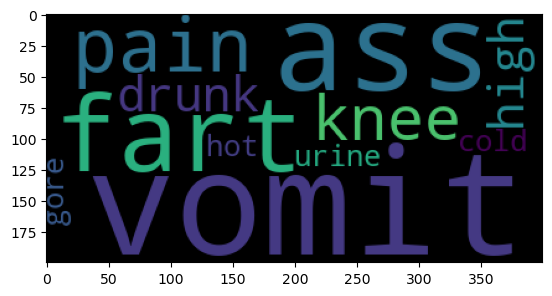

In [9]:
import matplotlib.pyplot as plt

plt.imshow(check_em_words)

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

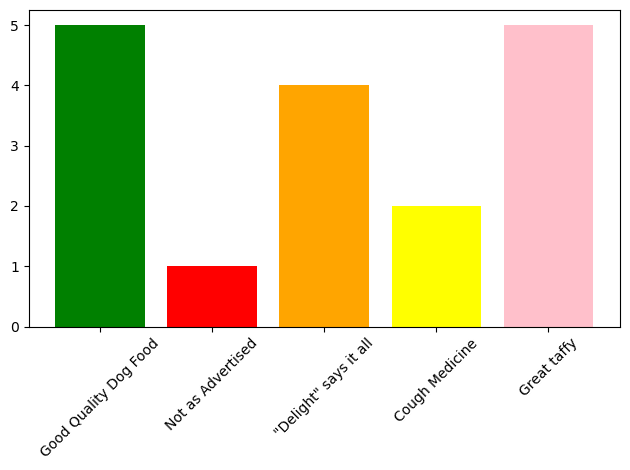

In [11]:
plt.bar(df['Summary'][:5],df['Score'][:5],color =['green','red','orange','yellow','pink'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
def preprocess(sentence):
    fin=[]
    win=[]
    stm = PorterStemmer()
    fin = stm.stem(sentence)
    fin = word_tokenize(fin)
    for i in fin:
        if i not in stopwords.words():
            win.append(i)
    return win

In [13]:
senti= {}
sia = SentimentIntensityAnalyzer()
for index,row in df.iterrows():
    senti[index] = (preprocess(row['Text']))

In [44]:
sentiments = {}
denti = {}
for index,rows in senti.items():
    senti[index] = " ".join(rows)

for index,rows in senti.items():
    sentiments[index] = sia.polarity_scores(rows)

for index,rows in df.iterrows():
    denti[index] = sia.polarity_scores(rows['Text'])


In [45]:
denti = pd.DataFrame(denti).T

In [46]:
denti = denti.reset_index()

In [47]:
denti = denti.rename(columns={'index':'Id'})

In [48]:
denti.Id = denti.Id + 1

In [49]:
denti

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
195,196,0.000,0.761,0.239,0.9538
196,197,0.000,0.917,0.083,0.4738
197,198,0.000,0.904,0.096,0.4153
198,199,0.000,0.701,0.299,0.8268
